In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import random

# Setup train/test/valid

In [3]:
def separate_test_index(seed=9001,listlen=86,wantnum=7):
    random.seed(seed)
    # define test indices
    testint = ([random.randint(0, listlen-1) for _ in range(wantnum)])
    # list of all indices
    allint = [int(obj) for obj in np.linspace(0,listlen-1,listlen)]
    # filter test indices
    testvalidint = [obj for obj in allint if obj not in testint]
    return testint,testvalidint

In [4]:
# get test index and train-validation indices
testint,testvalidint = separate_test_index()
# Set up seed
random.seed(9001)
# get validation indices
validint = random.sample(testvalidint, 7)
# filter validation indices
trainint = [obj for obj in testvalidint if obj not in validint]

# Process data

In [10]:
path='C:\\Users\\fabau\OneDrive\\Documents\\GitHub\\master-project-cleaned\\data\\time_series_1h_EU\\instantaneous_10m_wind_gust\\instantaneous_10m_wind_gust_max.csv'
timeseries_df = pd.read_csv(path)

# drop the first column
timeseries_df = timeseries_df.drop(columns=[timeseries_df.columns[0]])

# drop the storm index, start date and name columns
timeseries_df = timeseries_df.drop(columns=['storm_index','start_date','storm_name'])

In [11]:
timeseries_df.to_numpy()[trainint,:].shape

(74, 15)

In [12]:
pca = PCA()
pca.fit(timeseries_df)

PCA()

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.71697623, 0.91712943, 0.95089541, 0.96629503, 0.97629115,
       0.98286672, 0.98780044, 0.99063833, 0.99303696, 0.99502971,
       0.99658111, 0.99774483, 0.99860572, 0.99941338, 1.        ])

In [14]:
pca.transform(timeseries_df)[0]

array([-37.13759997,  34.85490214, -10.87746436,  -6.35669557,
         1.62472942,  -4.27185197,  -5.76420661,  -1.41594356,
         3.86467777,  -0.11562375,   0.06023044,   1.16462664,
        -0.40961606,   0.27909208,  -0.74015035])

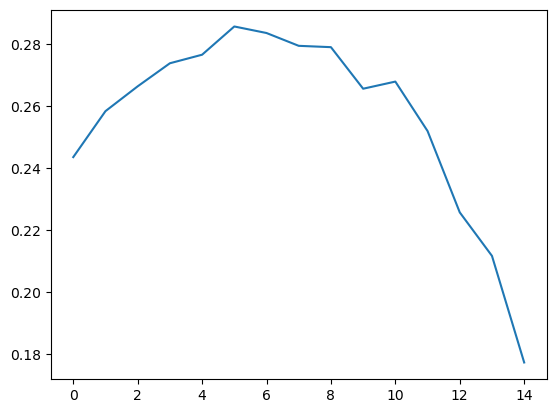

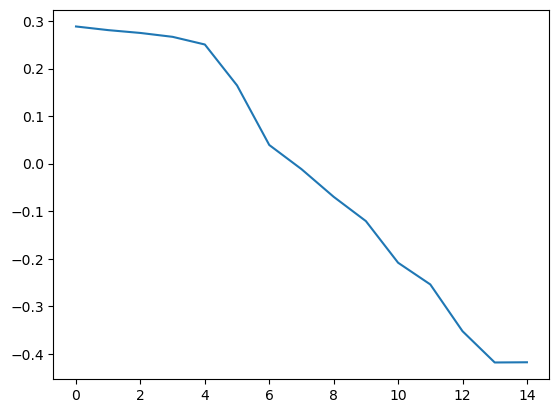

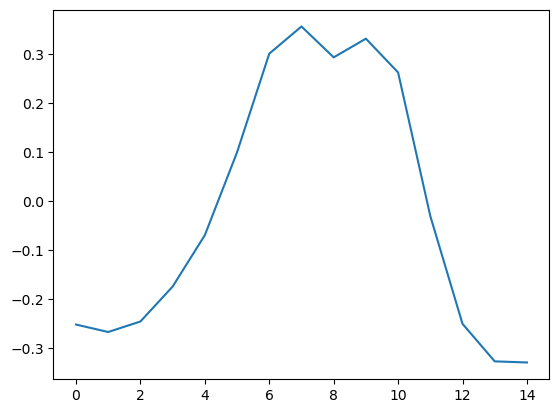

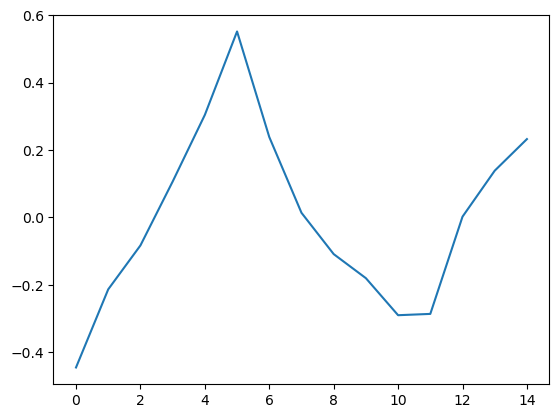

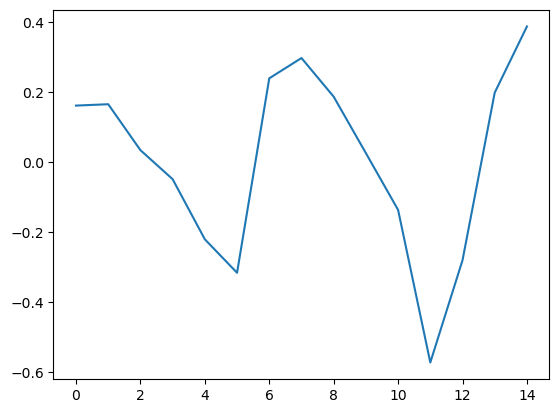

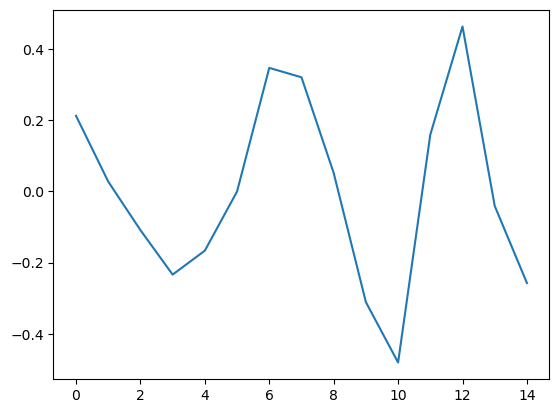

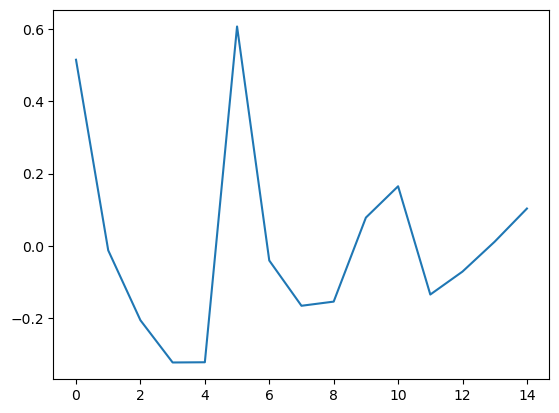

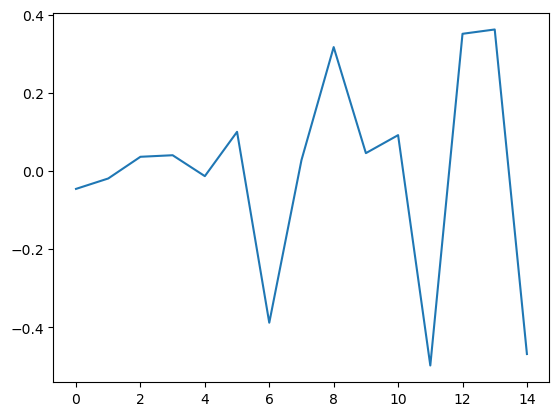

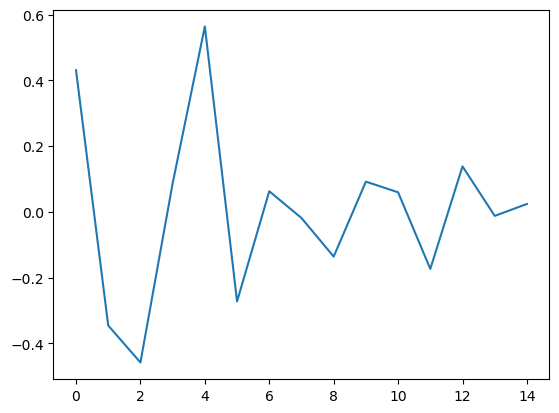

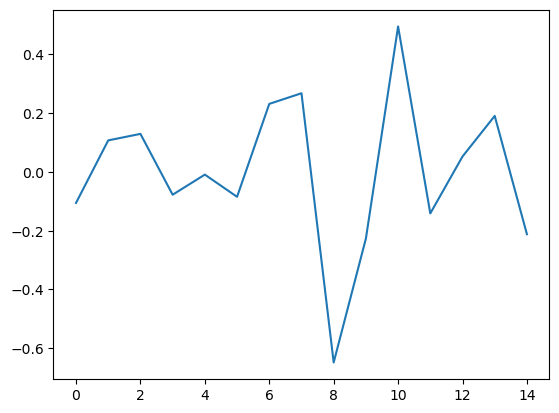

In [17]:
for i in range(0,10):
    plt.plot(pca.components_[i,...])
    plt.show()

In [18]:
pca.transform(timeseries_df)[0,...]

array([-37.13759997,  34.85490214, -10.87746436,  -6.35669557,
         1.62472942,  -4.27185197,  -5.76420661,  -1.41594356,
         3.86467777,  -0.11562375,   0.06023044,   1.16462664,
        -0.40961606,   0.27909208,  -0.74015035])

# function for training set 

In [73]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

print(custom_library_path)

import extraction_squares, time_series

/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/processing


In [27]:
i10fg_max = pd.read_csv('data/time_series_1h_non_EU/2m_dewpoint_temperature/2m_dewpoint_temperature_max.csv')
index_storm_EU = i10fg_max['storm_index'].copy()

storm_index_training, storm_index_test, storm_index_validation = extraction_squares.split_storm_numbers(index_storm_EU)

# order the index of the storms

storm_index_training = storm_index_training.sort_values()
storm_index_test = storm_index_test.sort_values()
storm_index_validation =storm_index_validation.sort_values()

print("Storm Training:", storm_index_training.array[:])
print("Storm Test:", storm_index_test.array[:])
print("Storm Valid:", storm_index_validation.array[:])

Storm Training: <NumpyExtensionArray>
[ 1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 13, 15, 16, 19, 20, 21, 26, 27, 28,
 29, 30, 32, 33, 34, 37, 38, 40, 42, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54,
 56, 60, 61, 62, 63, 64, 66, 69, 71, 73, 74, 79, 80, 82, 84, 85, 86, 87, 88,
 89, 91, 93]
Length: 60, dtype: int64
Storm Test: <NumpyExtensionArray>
[22, 31, 35, 46, 58, 67, 68, 72, 76, 78, 83, 90]
Length: 12, dtype: int64
Storm Valid: <NumpyExtensionArray>
[10, 14, 17, 23, 39, 43, 59, 65, 75, 77, 81, 95, 96]
Length: 13, dtype: int64


Explained variance ratio: [0.946645   0.97086529 0.984851   0.98928266 0.99223113 0.99449545
 0.99598574 0.99691508 0.99762309 0.9980634  0.99841683 0.9987457
 0.99901307 0.99919925 0.99937066 0.99950367 0.99960151 0.99967879
 0.99975053 0.99979862 0.99983976 0.999872   0.99989814 0.9999174
 0.99993632 0.99994956 0.99996101 0.99997169 0.99998044 0.99998583
 0.99999007 0.99999316 0.99999554 0.99999737 0.9999989  1.        ]
We want to keep 98.0 % of the variance, so we need 3 components
Explained variance ratio shape: (36,)
Eigenvalues : [3.07150195e+03 7.85856238e+01 4.53782914e+01 1.43790327e+01
 9.56668650e+00 7.34684764e+00 4.83540132e+00 3.01535031e+00
 2.29724219e+00 1.42863768e+00 1.14675431e+00 1.06703038e+00
 8.67531011e-01 6.04078114e-01 5.56174963e-01 4.31555250e-01
 3.17457208e-01 2.50755400e-01 2.32744918e-01 1.56057535e-01
 1.33454269e-01 1.04607088e-01 8.48351852e-02 6.24884254e-02
 6.13714925e-02 4.29787744e-02 3.71523753e-02 3.46294453e-02
 2.83877941e-02 1.74928371e-02

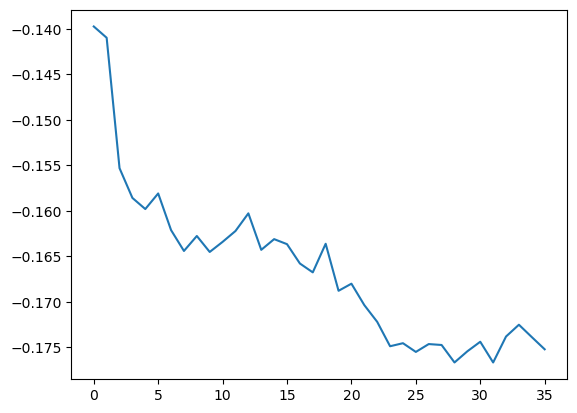

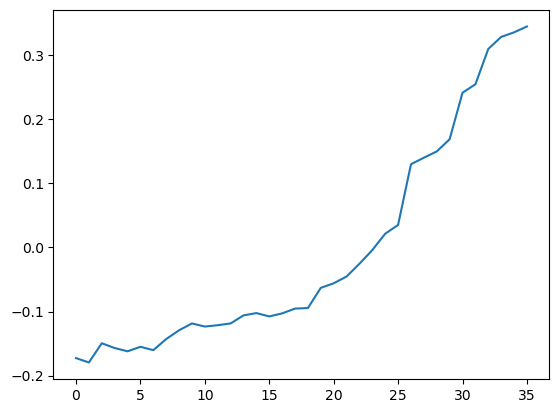

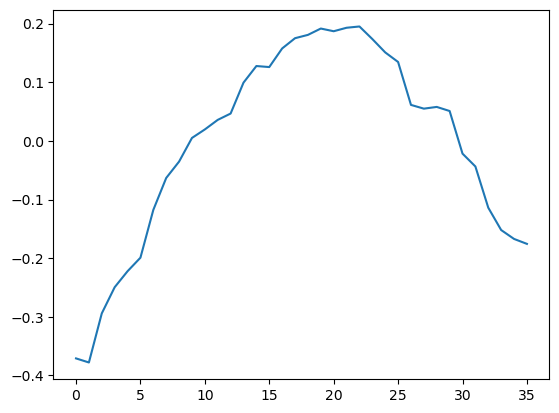

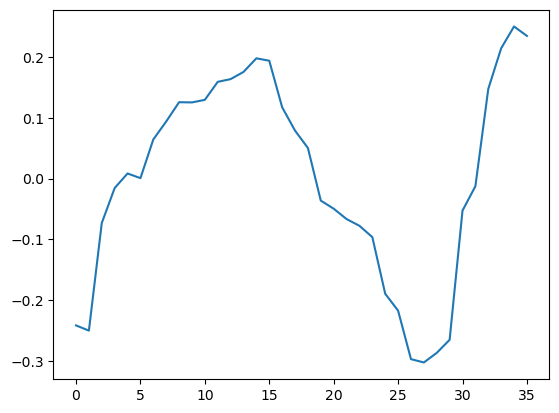

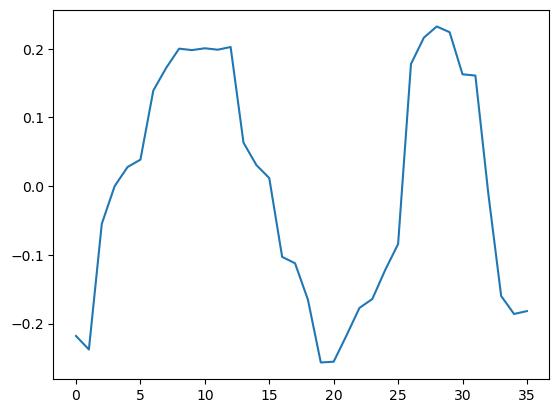

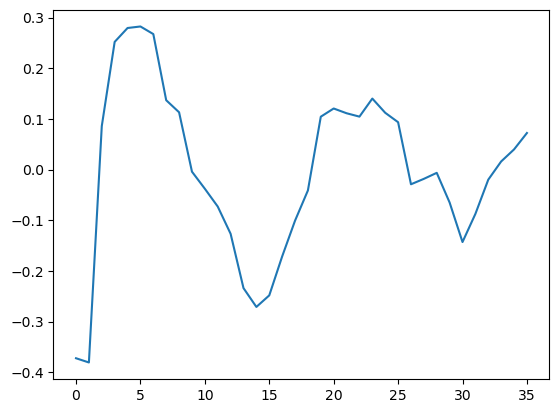

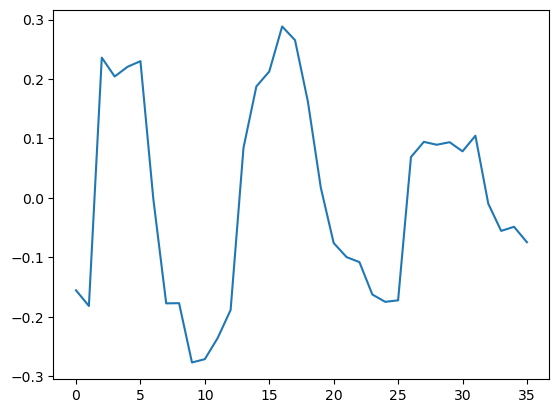

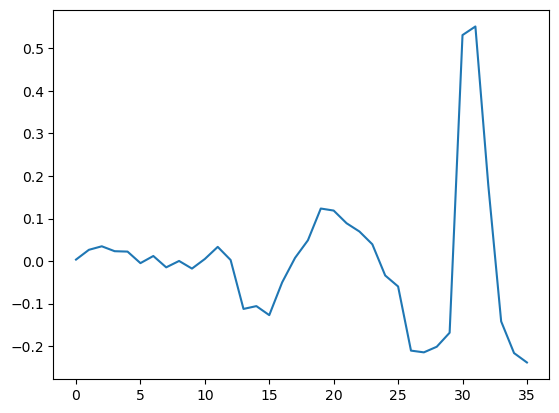

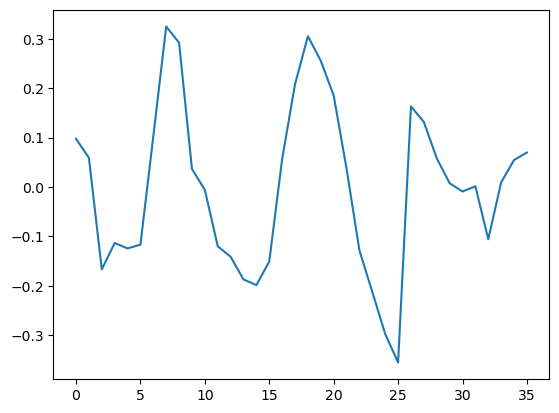

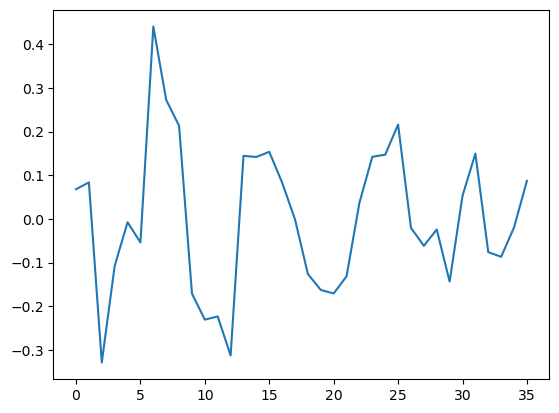

In [78]:
t2m_dewpoint = pd.read_csv('data/time_series_1h_non_EU/2m_dewpoint_temperature/2m_dewpoint_temperature_max.csv')

def get_storms_data(data, storm_index):
    return data.loc[data['storm_index'].isin(storm_index)]

t2m_dewpoint_training = get_storms_data(t2m_dewpoint, storm_index_training)

# drop unneccessary columns
t2m_dewpoint_training = t2m_dewpoint_training.drop(columns=['storm_index','Unnamed: 0'])

# standardize the data by row
'''t2m_dewpoint_training = t2m_dewpoint_training.T
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(t2m_dewpoint_training)
t2m_dewpoint_training_scaler = scaler.transform(t2m_dewpoint_training)
t2m_dewpoint_training = (t2m_dewpoint_training - t2m_dewpoint_training.mean())/t2m_dewpoint_training.std()
#t2m_dewpoint_training = t2m_dewpoint_training.T
'''
if 1 + 1 == 2:
    pca = PCA()
    pca.fit(t2m_dewpoint_training)

    # how many components are needed to explain 98% of the variance
    pca.explained_variance_ratio_.cumsum()
    print('Explained variance ratio:', pca.explained_variance_ratio_.cumsum())
    # get the number of components needed to explain 98% of the variance
    explained_variance = pca.explained_variance_ratio_.cumsum()
    # take the first value that is greater than 0.98
    threshold = 0.98
    # Find the index of the first value meeting the threshold
    first_above_idx = np.argmax(explained_variance >= threshold)

    # Filter values
    n_components = explained_variance[(explained_variance < threshold) | (np.arange(len(explained_variance)) == first_above_idx)]
    n_components = explained_variance[:len(n_components)]

    #n_components = explained_variance[explained_variance > 0.98]
    print('We want to keep', threshold*100,'% of the variance, so we need', n_components.shape[0], 'components')
    print('Explained variance ratio shape:', pca.explained_variance_ratio_.shape)
    eigenvalues = pca.explained_variance_
    print('Eigenvalues :', eigenvalues)
    print('Eigenvalues shape:', len(eigenvalues))

    # transform the data
    transformed_data = pca.transform(t2m_dewpoint_training)

    print('Length of PCA components:',len(pca.components_))
    print('Shape of PCA components:', pca.components_[:].shape)
    #print(pca.components_[:])

    # get the eigenvectors
    for i in range(0,10):
        plt.plot(pca.components_[i,...])
        plt.show()
